In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
df = pd.read_csv('../Dataset/train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
df = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Num_Credit_Inquiries', 'Payment_Behaviour', 'Type_of_Loan', 'Payment_of_Min_Amount', 'Credit_Mix'], axis=1)

In [5]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,26.822620,265.0,49.574949,21.46538,312.494089,Good
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,809.98,31.944960,266.0,49.574949,21.46538,284.629162,Good
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,28.609352,267.0,49.574949,21.46538,331.209863,Good
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,809.98,31.377862,268.0,49.574949,21.46538,223.451310,Good
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,809.98,24.797347,269.0,49.574949,21.46538,341.489231,Good


In [6]:
df.shape

(100000, 17)

In [7]:
duplicate_rows = df[df.duplicated()]
print('Banyak baris duplikat:', duplicate_rows.shape)

Banyak baris duplikat: (0, 17)


In [8]:
dataNum1 = df.iloc[:, :6]
dataNum2 = df.iloc[:, 6:12]
dataNum3 = df.iloc[:, 12:-1]

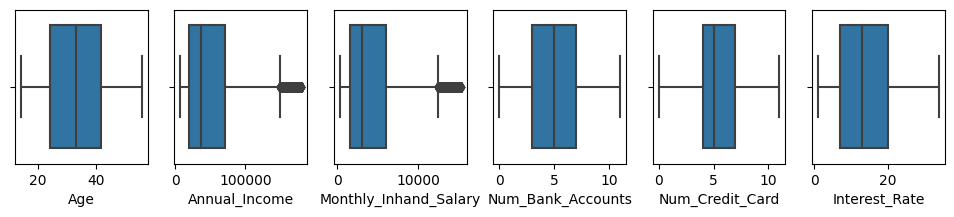

In [9]:
fig, ax = plt.subplots(figsize=(12,2))
i = 1
for data1 in dataNum1.columns:
    plt.subplot(1, len(dataNum1.columns), i)
    sns.boxplot(x=f'{data1}', data=dataNum1)
    i += 1
plt.show()

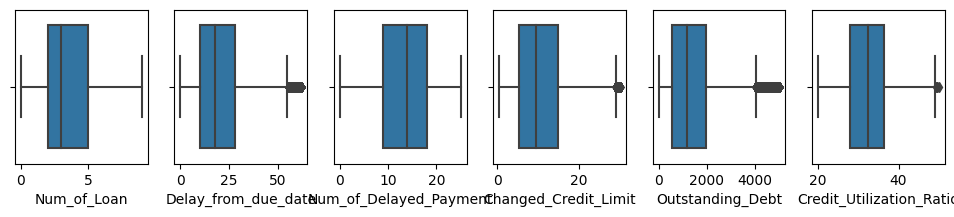

In [10]:
fig, ax = plt.subplots(figsize=(12,2))
i = 1
for data2 in dataNum2.columns:
    plt.subplot(1, len(dataNum2.columns), i)
    sns.boxplot(x=f'{data2}', data=dataNum2)
    i += 1
plt.show()

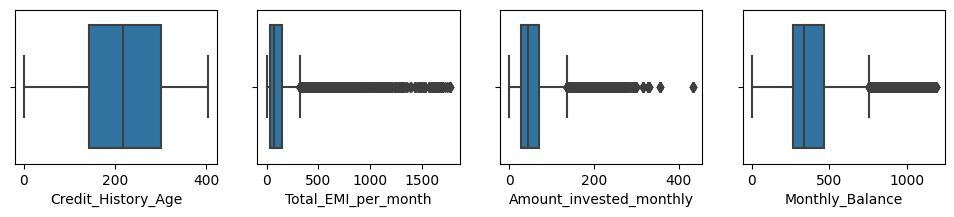

In [11]:
fig, ax = plt.subplots(figsize=(12,2))
i = 1
for data3 in dataNum3.columns:
    plt.subplot(1, len(dataNum3.columns), i)
    sns.boxplot(x=f'{data3}', data=dataNum3)
    i += 1
plt.show()


Terdapat outliner pada kolom Annual_Income, Monthly_Inhand_Salary, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Total_EMI_per_month, Amount_invested_monthly, dan Monthly_Balance.

In [12]:
data_num = df.iloc[:, :-1]
data_num.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,26.822620,265.0,49.574949,21.46538,312.494089
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,809.98,31.944960,266.0,49.574949,21.46538,284.629162
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,28.609352,267.0,49.574949,21.46538,331.209863
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,809.98,31.377862,268.0,49.574949,21.46538,223.451310
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,809.98,24.797347,269.0,49.574949,21.46538,341.489231


In [13]:
trim_percent = 10 
for data in data_num.columns:
    lower_bound = np.percentile(data_num[f'{data}'], trim_percent/2)
    upper_bound = np.percentile(data_num[f'{data}'], 100 - trim_percent/2)
    print(f'{i}.', lower_bound, upper_bound)
    df[f'{data}'] = df[f'{data}'][(df[f'{data}']>lower_bound) & (df[f'{data}']<upper_bound)]

5. 17.0 52.0
5. 9732.454000000002 130289.65499999996
5. 836.1258333333333 10831.77
5. 1.0 10.0
5. 3.0 9.0
5. 2.0 31.0
5. 0.0 8.0
5. 3.0 54.0
5. 2.0 23.0
5. 1.49 23.590499999999885
5. 118.54650000000049 4073.760499999988
5. 24.230834368769866 40.220207036533665
5. 65.0 381.0
5. 0.0 325.1832678664092
5. 13.506907477257542 131.44814575039757
5. 162.17652133874572 833.9681869518153


In [14]:
df.isnull().any()

Age                          True
Annual_Income                True
Monthly_Inhand_Salary        True
Num_Bank_Accounts            True
Num_Credit_Card              True
Interest_Rate                True
Num_of_Loan                  True
Delay_from_due_date          True
Num_of_Delayed_Payment       True
Changed_Credit_Limit         True
Outstanding_Debt             True
Credit_Utilization_Ratio     True
Credit_History_Age           True
Total_EMI_per_month          True
Amount_invested_monthly      True
Monthly_Balance              True
Credit_Score                False
dtype: bool

In [15]:
df.isnull().sum()

Age                         11766
Annual_Income               10000
Monthly_Inhand_Salary       10008
Num_Bank_Accounts           14295
Num_Credit_Card             27706
Interest_Rate               11552
Num_of_Loan                 18600
Delay_from_due_date         11286
Num_of_Delayed_Payment      12785
Changed_Credit_Limit        10016
Outstanding_Debt            10000
Credit_Utilization_Ratio    10000
Credit_History_Age          10351
Total_EMI_per_month         15991
Amount_invested_monthly     10000
Monthly_Balance             10000
Credit_Score                    0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().any()

Age                         False
Annual_Income               False
Monthly_Inhand_Salary       False
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                 False
Delay_from_due_date         False
Num_of_Delayed_Payment      False
Changed_Credit_Limit        False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Credit_History_Age          False
Total_EMI_per_month         False
Amount_invested_monthly     False
Monthly_Balance             False
Credit_Score                False
dtype: bool

# Heat Map

<Axes: >

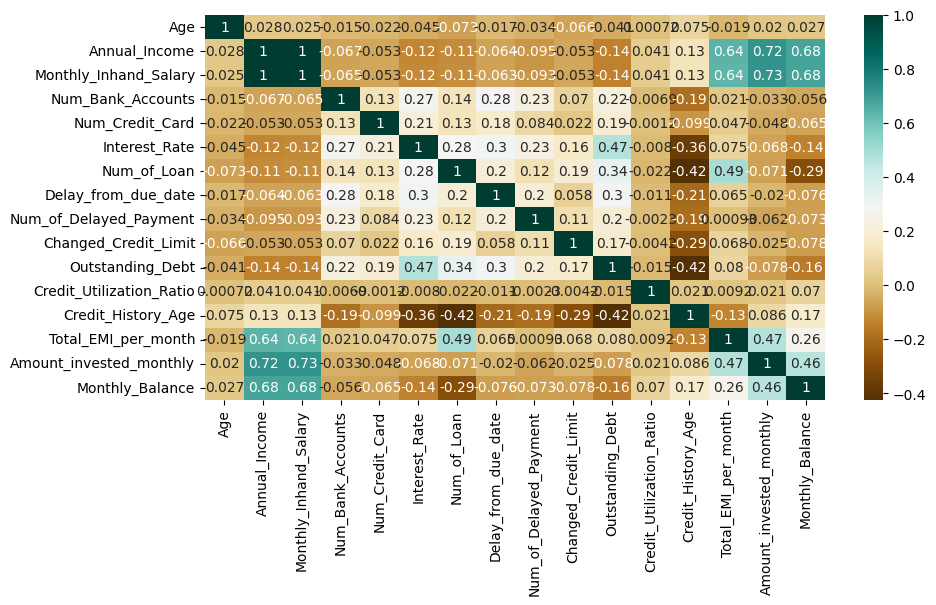

In [18]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
bestfeature = SelectKBest(score_func=chi2, k=10)
fit = bestfeature.fit(X,y)

In [21]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [22]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  

In [23]:
featureScores

,Specs,Score
0,Age,1.354081e+02
1,Annual_Income,1.648950e+06
2,Monthly_Inhand_Salary,1.321903e+05
3,Num_Bank_Accounts,4.768335e+02
4,Num_Credit_Card,1.783704e+02
5,Interest_Rate,1.126581e+04
6,Num_of_Loan,9.016268e+02
7,Delay_from_due_date,7.114007e+03
8,Num_of_Delayed_Payment,6.842436e+02
9,Changed_Credit_Limit,1.281642e+03


In [24]:
best_feat = featureScores.nlargest(10,'Score')
print(best_feat)

                    Specs         Score
10       Outstanding_Debt  1.765561e+06
1           Annual_Income  1.648950e+06
2   Monthly_Inhand_Salary  1.321903e+05
12     Credit_History_Age  5.841267e+04
5           Interest_Rate  1.126581e+04
15        Monthly_Balance  7.541405e+03
7     Delay_from_due_date  7.114007e+03
13    Total_EMI_per_month  5.133993e+03
9    Changed_Credit_Limit  1.281642e+03
6             Num_of_Loan  9.016268e+02


In [25]:
df_feat = best_feat['Specs'].unique()
df_feat

array(['Outstanding_Debt', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Credit_History_Age', 'Interest_Rate', 'Monthly_Balance',
       'Delay_from_due_date', 'Total_EMI_per_month',
       'Changed_Credit_Limit', 'Num_of_Loan'], dtype=object)

In [26]:
datas_feat = df[df_feat]
datas = datas_feat.reset_index()
datas

,index,Outstanding_Debt,Annual_Income,Monthly_Inhand_Salary,Credit_History_Age,Interest_Rate,Monthly_Balance,Delay_from_due_date,Total_EMI_per_month,Changed_Credit_Limit,Num_of_Loan
0,3,809.98,19114.12,1824.843333,268.0,3.0,223.451310,5.0,49.574949,6.27,4.0
1,4,809.98,19114.12,1824.843333,269.0,3.0,341.489231,6.0,49.574949,11.27,4.0
2,5,809.98,19114.12,1824.843333,270.0,3.0,340.479212,8.0,49.574949,9.27,4.0
3,56,1704.18,34081.38,2611.115000,176.0,15.0,298.192158,30.0,70.478333,17.13,3.0
4,57,1704.18,34081.38,2611.115000,176.0,15.0,392.196185,30.0,70.478333,17.13,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20283,99954,678.57,38321.39,3354.449167,205.0,3.0,381.405249,11.0,114.271146,1.59,4.0
20284,99992,502.38,39628.99,3359.415833,375.0,7.0,189.641080,23.0,35.104023,9.50,2.0
20285,99993,502.38,39628.99,3359.415833,376.0,7.0,400.104466,23.0,35.104023,11.50,2.0
20286,99994,502.38,39628.99,3359.415833,377.0,7.0,410.256158,20.0,35.104023,9.50,2.0


In [27]:
y = y.reset_index()
y

,index,Credit_Score
0,3,Good
1,4,Good
2,5,Good
3,56,Poor
4,57,Poor
...,...,...
20283,99954,Poor
20284,99992,Poor
20285,99993,Standard
20286,99994,Poor


In [28]:
df_clean = pd.merge(left=datas, right=y, how='inner', left_on='index', right_on='index')
df_clean.drop('index', axis=1, inplace=True)

In [29]:
df_clean.to_csv(path_or_buf='../Dataset/data_clean.csv')